In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\FINAL PROJECT\french-box-office\data\dataset_final.csv')

In [56]:
df.drop(columns='Unnamed: 0',inplace=True)

In [57]:
df.shape

(3973, 27)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   global_rank          3971 non-null   float64
 1   title                3971 non-null   object 
 2   id                   3971 non-null   float64
 3   release_date         3971 non-null   object 
 4   day                  3971 non-null   float64
 5   month                3971 non-null   float64
 6   year                 3971 non-null   float64
 7   max_theaters_used    3971 non-null   float64
 8   first_day_sales      3819 non-null   float64
 9   first_weekend_sales  3797 non-null   float64
 10  first_week_sales     3971 non-null   float64
 11  total_sales          3971 non-null   float64
 12  viewers_by_theaters  3971 non-null   float64
 13  tmdb_id              2358 non-null   float64
 14  budget               3973 non-null   float64
 15  imdb_id              2201 non-null   o

In [59]:
df['release_date']= pd.to_datetime(df['release_date'],format = '%Y-%m-%d')

In [62]:
releases_by_date=df[['release_date','title']].groupby('release_date').agg('count')

<AxesSubplot:xlabel='release_date'>

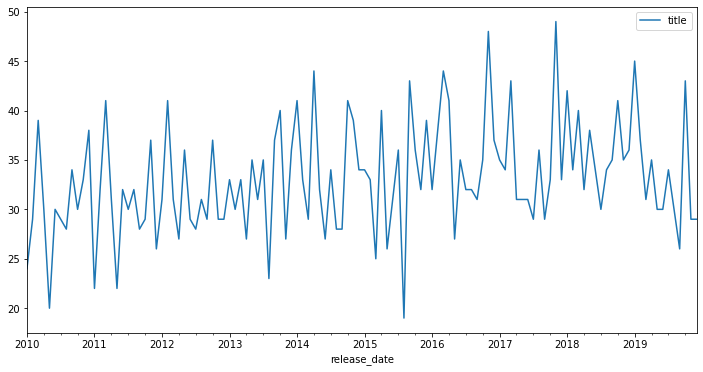

In [63]:

releases_month = releases_by_date.groupby(pd.Grouper( freq='1M')).sum() 
releases_month.plot(figsize=(12,6))

In [66]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

<ipython-input-67-d473e40369ef>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(releases_by_date['title'], freq=60)


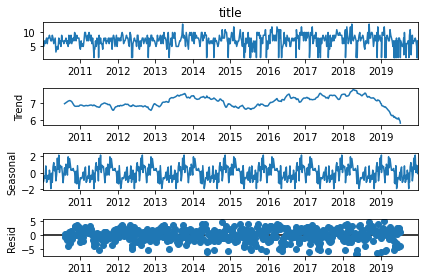

In [67]:
result= sm.tsa.seasonal_decompose(releases_by_date['title'], freq=60)
result.plot()
plt.show()

In [68]:
sales_by_date=df[['release_date','total_sales']].groupby('release_date').agg('sum')

sales_by_date.head()

,total_sales
release_date,
2010-01-06,1285370.0
2010-01-13,3950829.0
2010-01-20,2841223.0
2010-01-27,7725836.0
2010-02-03,4194071.0


<ipython-input-71-8574bbcfdbf7>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(sales_by_date, freq=60)


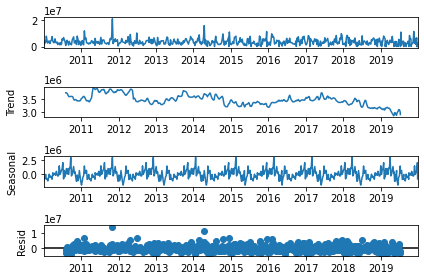

In [71]:
result= sm.tsa.seasonal_decompose(sales_by_date, freq=60)
result.plot()
plt.show()

<AxesSubplot:xlabel='release_date'>

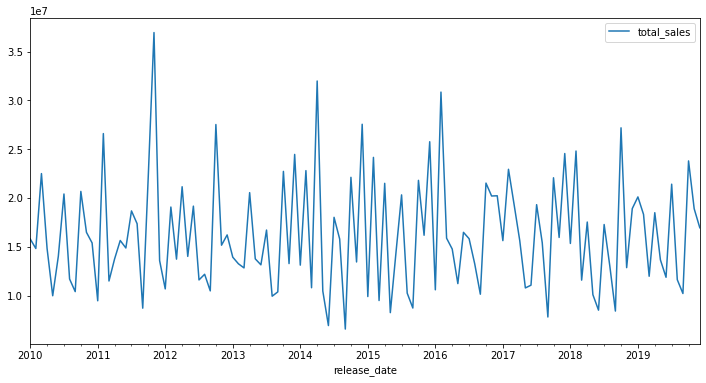

In [72]:
sales_month = sales_by_date.groupby(pd.Grouper( freq='1M')).sum() 
sales_month.plot(figsize=(12,6))

AttributeError: 'AxesSubplot' object has no attribute 'figsize'

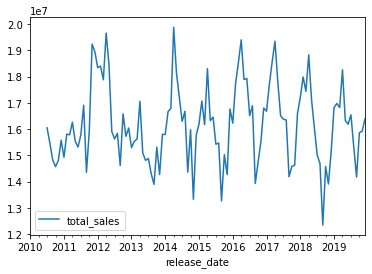

In [75]:
sales_month.rolling(window=7).mean().plot().figsize((9,12))